<center>
<img src="https://i.imgur.com/FMnmJeU.png"/>

# **Desafio Laboratório BigMAAp - Previsão de Temperatura por Meio de Regressão Linear em Séries Temporais**

</center>

O objetivo deste desafio foi coletar dados de temperatura de uma API pública, realizar a limpeza e tratamento desses dados, gerar um modelo de regressão linear e realizar a predição de valores de temperatura para uma semana, comparando com os dados reais para medir a precisão do modelo.



## **Obtenção dos dados**

Os dados da série temporal de temperaturas foram obtidos por meio da API [Open-Meteo](https://open-meteo.com/en/docs/historical-weather-api). Foram utilizados os dados históricos da cidade de Sorocaba - SP, coletados de hora em hora.

In [2]:
import requests

# Definindo a cidade de obtenção dos dados
latitude = -23.50
longitude = -47.46

# Definindo as features de interesse
start_date = "1940-01-01"
end_date = "2023-04-08"
vars = 'temperature_2m,relativehumidity_2m,dewpoint_2m,pressure_msl,surface_pressure,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,et0_fao_evapotranspiration,vapor_pressure_deficit,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm'

# Fazendo a requisição de dados
url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={vars}'
response = requests.get(url)

# Verificando se a requisição foi bem sucedida
if response.status_code == 200:
    # Convertendo a resposta em um objeto JSON
    data = response.json()
    print('Requisição bem sucedida!')
else:
    print(f'Erro na requisição: {response.status_code}')

Requisição bem sucedida!


Em seguida, o objeto JSON foi convertido em um dataframe:

In [5]:
import pandas as pd

# Criando o DataFrame
temperature_data = pd.DataFrame(data['hourly'])

# Renomeando as colunas
temperature_data = temperature_data.rename(columns={'time':'Data/Hora',
            'temperature_2m':'temperature (°C)',
            'relativehumidity_2m':'umidade_relativa (%)',
            'dewpoint_2m':'ponto_de_orvalho (°C)',
            'pressure_msl':'pressão_nível_mar (hPa)',
            'surface_pressure':'pressão_superfície (hPa)',
            'rain':'chuva (mm)',
            'cloudcover': 'cobertura_nuvens (%)',
            'cloudcover_low': 'cobertura_nuvens_baixo (%)',
            'cloudcover_mid': 'cobertura_nuvens_meio (%)',
            'cloudcover_high': 'cobertura_nuvens_alto (%)',
            'shortwave_radiation': 'radiação_ondas_curtas (W/m²)',
            'direct_radiation': 'radiação_direta (W/m²)',
            'diffuse_radiation': 'radiação_difusa (W/m²)',
            'direct_normal_irradiance': 'irradiância_normal_direta (W/m²)',
            'windspeed_10m': 'velocidade_vento_10m (km/h)',
            'windspeed_100m': 'velocidade_vento_100m (km/h)',
            'winddirection_10m': 'direção_vento_10m (°)',
            'winddirection_100m': 'direção_vento_100m (°)',
            'windgusts_10m': 'rajada_vento_10m (km/h)',
            'et0_fao_evapotranspiration': 'evapotranspiração (mm)',
            'vapor_pressure_deficit': 'déficit_pressão_vapor (kPa)',
            'soil_temperature_0_to_7cm': 'temperatura_solo_0_a_7cm (°C)',
            'soil_temperature_7_to_28cm': 'temperatura_solo_7_a_28cm (°C)',
            'soil_temperature_28_to_100cm': 'temperatura_solo_28_a_100cm (°C)',
            'soil_temperature_100_to_255cm': 'temperatura_solo_100_a_255cm (°C)',
            'soil_moisture_0_to_7cm': 'umidade_solo_0_a_7cm (m³/m³)',
            'soil_moisture_7_to_28cm': 'umidade_solo_7_a_28cm (m³/m³)',
            'soil_moisture_28_to_100cm': 'umidade_solo_28_a_100cm (m³/m³)',
            'soil_moisture_100_to_255cm': 'umidade_solo_100_a_255cm (m³/m³)'})

Visualizando o dataframe obtido:



In [6]:
temperature_data.set_index('Data/Hora', inplace=True)

temperature_data.head(5)

,temperature (°C),umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1940-01-01T00:00,17.4,93.0,16.2,1015.0,944.3,NaN,61.0,34.0,9.0,83.0,...,NaN,0.15,18.3,19.4,20.7,20.0,0.477,0.484,0.489,0.462
1940-01-01T-23:00,17.2,94.0,16.1,1015.7,944.9,NaN,71.0,41.0,13.0,88.0,...,NaN,0.13,18.1,19.4,20.7,20.0,0.475,0.482,0.489,0.463
1940-01-01T-22:00,17.2,94.0,16.1,1015.6,944.8,NaN,78.0,51.0,10.0,86.0,...,NaN,0.13,17.9,19.3,20.7,20.0,0.473,0.481,0.489,0.463
1940-01-01T-21:00,17.1,94.0,16.1,1015.4,944.6,NaN,100.0,66.0,47.0,93.0,...,NaN,0.12,17.8,19.2,20.7,20.0,0.472,0.479,0.489,0.463
1940-01-01T-20:00,17.1,94.0,16.0,1014.8,944.1,NaN,100.0,97.0,94.0,94.0,...,NaN,0.13,17.7,19.2,20.7,20.0,0.470,0.478,0.488,0.463


Obtendo informações do conjunto de dados, como a quantidade e o tipo das variáveis, se há valores nulos, a escala dos dados e se há colunas com valores repetidos:

In [9]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729936 entries, 1940-01-01T00:00 to 2023-04-08T23:00
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   temperature (°C)                   729912 non-null  float64
 1   umidade_relativa (%)               729912 non-null  float64
 2   ponto_de_orvalho (°C)              729912 non-null  float64
 3   pressão_nível_mar (hPa)            729912 non-null  float64
 4   pressão_superfície (hPa)           729912 non-null  float64
 5   chuva (mm)                         729905 non-null  float64
 6   cobertura_nuvens (%)               729912 non-null  float64
 7   cobertura_nuvens_baixo (%)         729912 non-null  float64
 8   cobertura_nuvens_meio (%)          729912 non-null  float64
 9   cobertura_nuvens_alto (%)          729912 non-null  float64
 10  radiação_ondas_curtas (W/m²)       729905 non-null  float64
 11  radiação_direta (W/

In [10]:
temperature_data.describe()

,temperature (°C),umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
count,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000,729905.000000,729912.000000,729912.000000,729912.000000,729912.000000,...,729905.000000,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000,729912.000000
mean,20.176333,77.702481,15.667077,1015.603757,945.519151,0.139505,46.526772,29.477452,20.765829,38.143993,...,0.144772,0.622725,21.141170,21.122719,21.105769,21.090838,0.342237,0.342395,0.333713,0.364348
std,4.608280,16.927266,3.864936,4.282422,3.543441,0.545761,34.160871,33.045314,27.445971,41.784603,...,0.193066,0.631827,4.476029,3.009034,2.257405,1.628690,0.081968,0.073488,0.068079,0.052256
min,0.500000,8.000000,-6.200000,994.700000,926.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.400000,10.000000,14.500000,16.700000,0.177000,0.211000,0.216000,0.236000
25%,17.000000,67.000000,13.000000,1012.600000,943.100000,0.000000,16.000000,2.000000,0.000000,0.000000,...,0.000000,0.170000,18.000000,18.900000,19.300000,19.800000,0.278000,0.281000,0.278000,0.336000
50%,20.100000,82.000000,16.000000,1015.300000,945.400000,0.000000,41.000000,15.000000,9.000000,15.000000,...,0.030000,0.380000,21.100000,21.400000,21.400000,21.200000,0.355000,0.348000,0.331000,0.365000
75%,23.300000,92.000000,18.900000,1018.400000,947.800000,0.000000,77.000000,49.000000,30.000000,88.000000,...,0.260000,0.900000,23.900000,23.400000,22.900000,22.400000,0.411000,0.403000,0.388000,0.398000
max,38.900000,100.000000,25.800000,1033.300000,961.100000,24.700000,100.000000,100.000000,100.000000,100.000000,...,0.960000,6.350000,44.200000,33.900000,29.000000,25.000000,0.495000,0.494000,0.493000,0.490000


## **Preparando os dados**

Importando os pacotes necessários para a análise:

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


Quantificando valores faltantes em cada coluna do dataframe:

In [12]:
temperature_data.isnull().sum()

temperature (°C)                     24
umidade_relativa (%)                 24
ponto_de_orvalho (°C)                24
pressão_nível_mar (hPa)              24
pressão_superfície (hPa)             24
chuva (mm)                           31
cobertura_nuvens (%)                 24
cobertura_nuvens_baixo (%)           24
cobertura_nuvens_meio (%)            24
cobertura_nuvens_alto (%)            24
radiação_ondas_curtas (W/m²)         31
radiação_direta (W/m²)               31
radiação_difusa (W/m²)               31
irradiância_normal_direta (W/m²)     31
velocidade_vento_10m (km/h)          24
velocidade_vento_100m (km/h)         24
direção_vento_10m (°)                24
direção_vento_100m (°)               24
rajada_vento_10m (km/h)              31
evapotranspiração (mm)               31
déficit_pressão_vapor (kPa)          24
temperatura_solo_0_a_7cm (°C)        24
temperatura_solo_7_a_28cm (°C)       24
temperatura_solo_28_a_100cm (°C)     24
temperatura_solo_100_a_255cm (°C)    24


In [19]:
missing_values = (temperature_data.isnull().sum())
print(f"Linhas com valores ausentes: {missing_values.sum()}")

Linhas com valores ausentes: 745


Como há poucos valores ausentes no universo de 729936 linhas, optei por remover as linhas com valores faltantes:

In [20]:
dataframe_no_null = temperature_data.dropna()

Checando se realmente as linhas foram removidas:

In [23]:
print(f"Shape do dataframe 'temperature_data': {temperature_data.shape}")

print(f"Shape do dataframe 'dataframe_no_null': {dataframe_no_null.shape}")

dataframe_no_null.isnull().sum()

Shape do dataframe 'temperature_data': (729936, 29)
Shape do dataframe 'dataframe_no_null': (729904, 29)


temperature (°C)                     0
umidade_relativa (%)                 0
ponto_de_orvalho (°C)                0
pressão_nível_mar (hPa)              0
pressão_superfície (hPa)             0
chuva (mm)                           0
cobertura_nuvens (%)                 0
cobertura_nuvens_baixo (%)           0
cobertura_nuvens_meio (%)            0
cobertura_nuvens_alto (%)            0
radiação_ondas_curtas (W/m²)         0
radiação_direta (W/m²)               0
radiação_difusa (W/m²)               0
irradiância_normal_direta (W/m²)     0
velocidade_vento_10m (km/h)          0
velocidade_vento_100m (km/h)         0
direção_vento_10m (°)                0
direção_vento_100m (°)               0
rajada_vento_10m (km/h)              0
evapotranspiração (mm)               0
déficit_pressão_vapor (kPa)          0
temperatura_solo_0_a_7cm (°C)        0
temperatura_solo_7_a_28cm (°C)       0
temperatura_solo_28_a_100cm (°C)     0
temperatura_solo_100_a_255cm (°C)    0
umidade_solo_0_a_7cm (m³/

Verificando a existência de outliers nos dados de cada feature utilizando gráficos box plot:

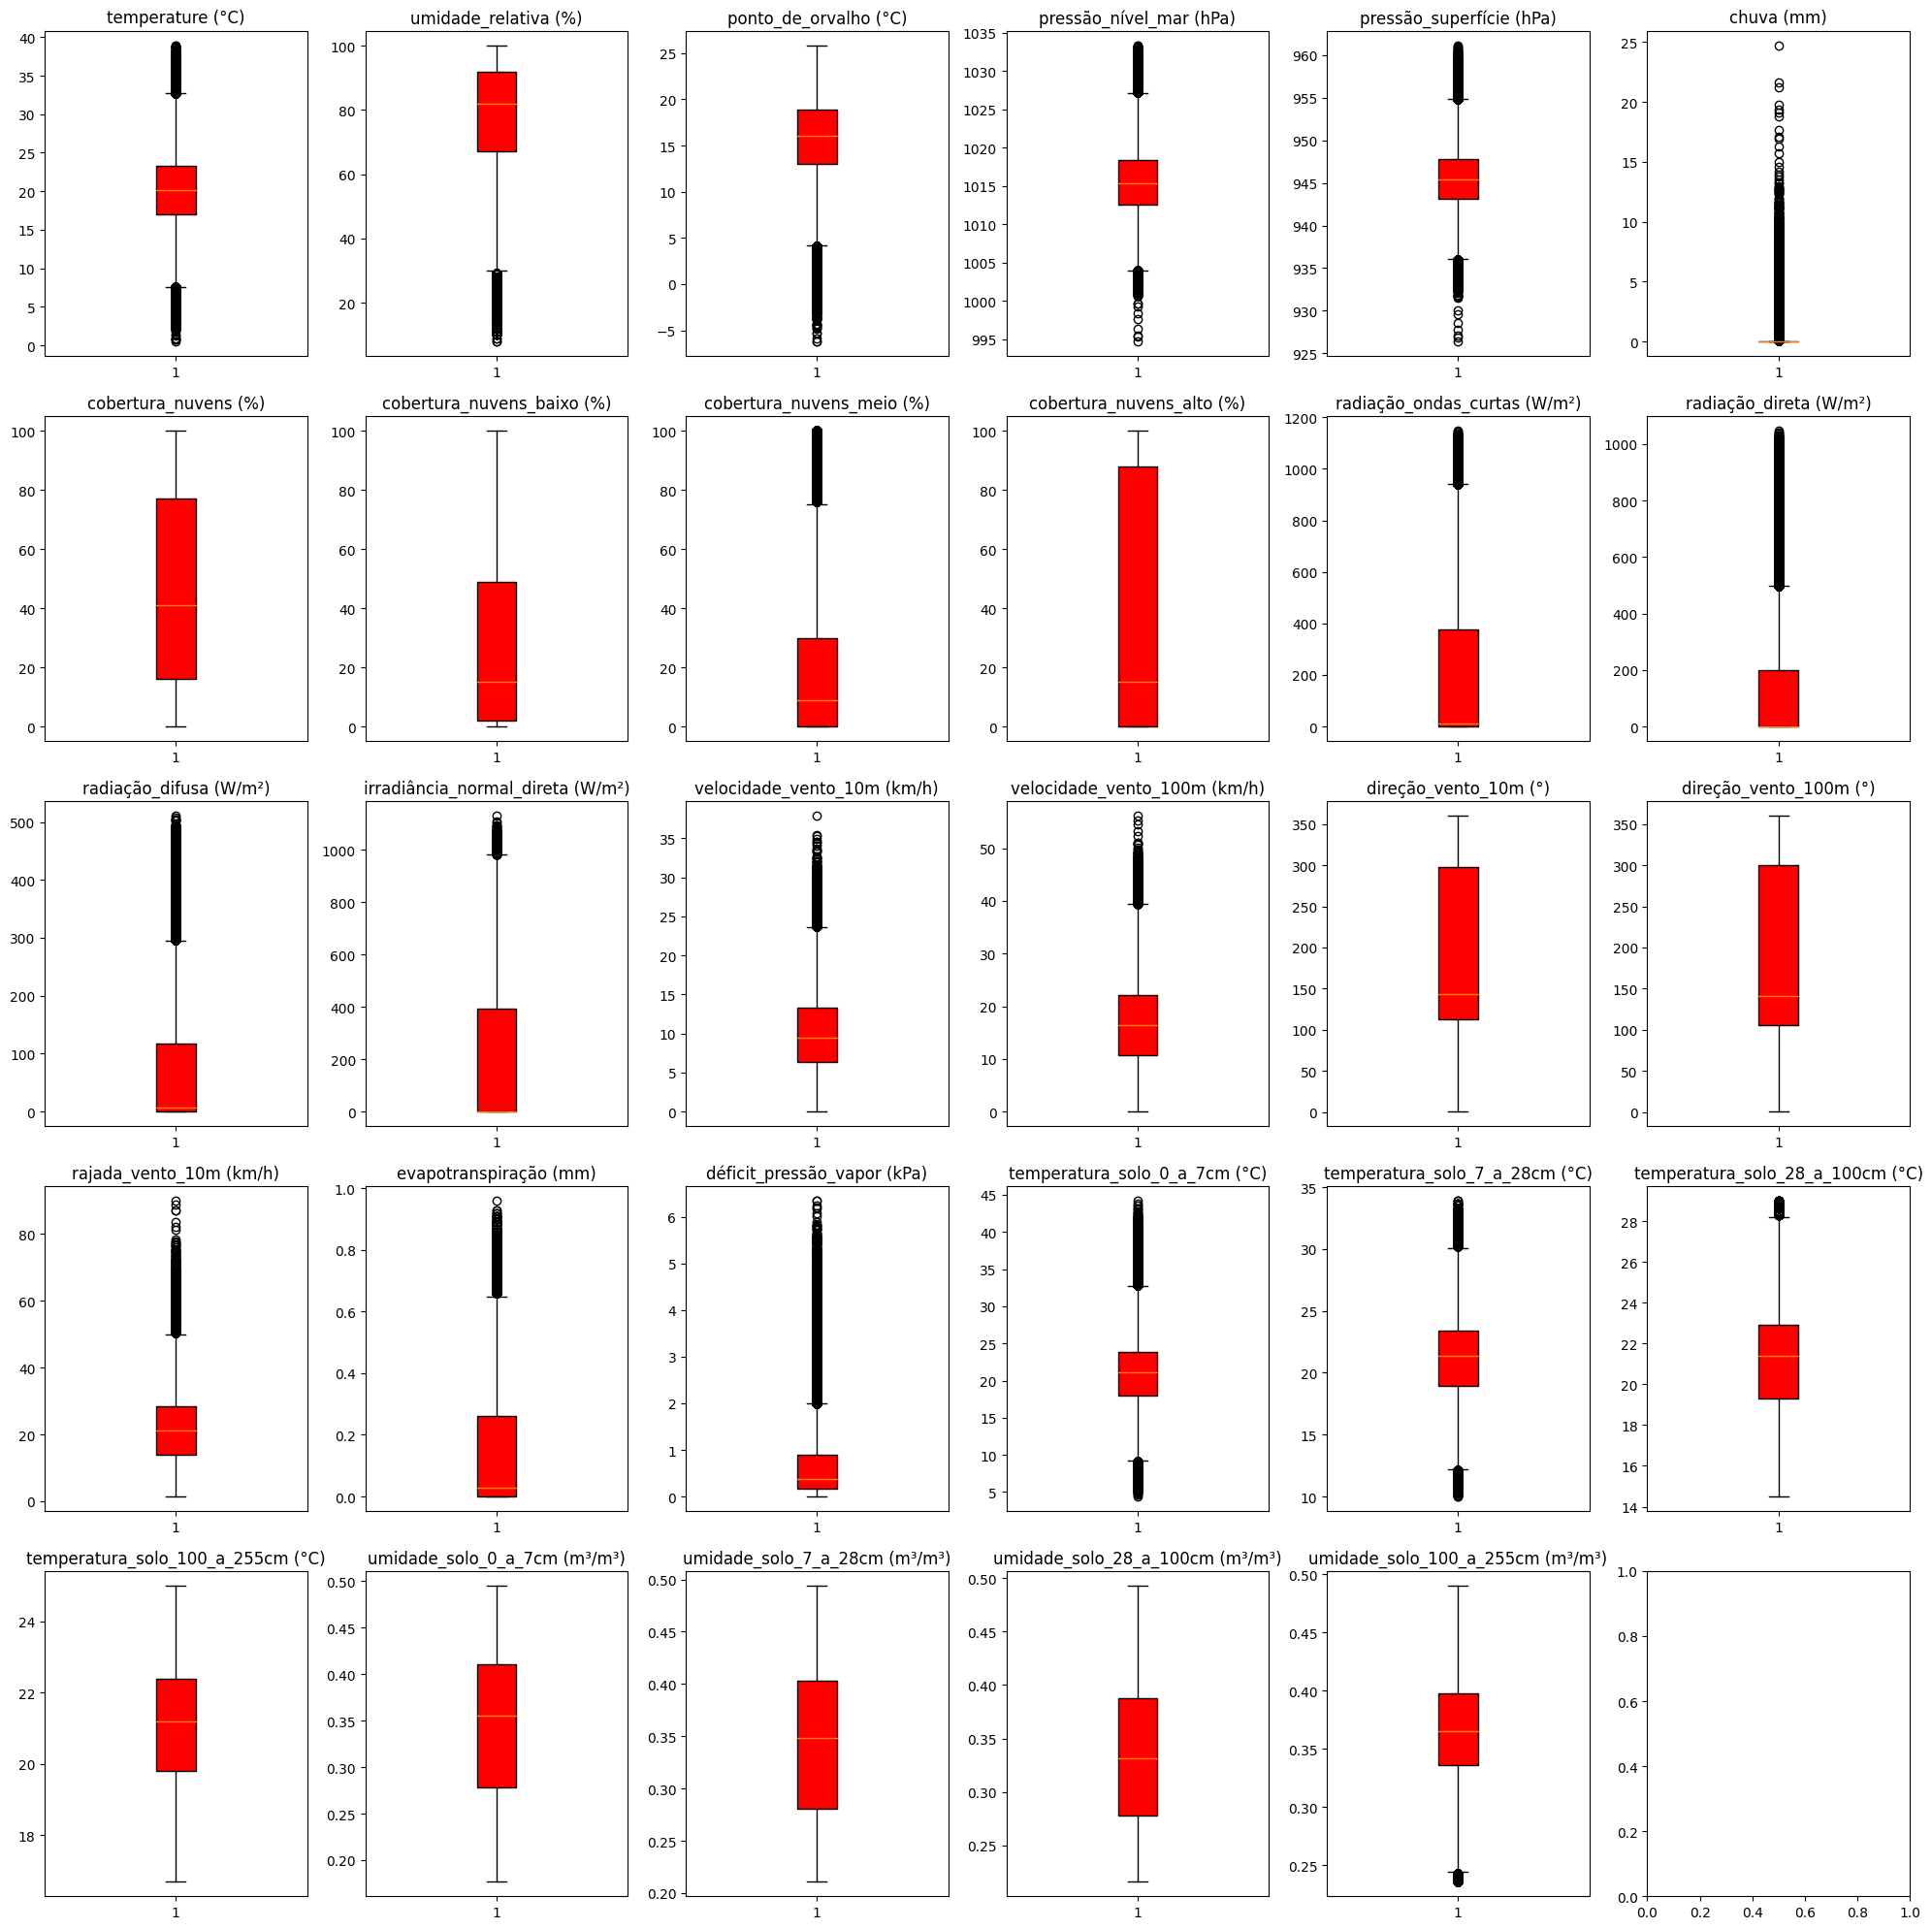

In [26]:
# Criando figura com 29 subplots
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

# Plotando box plot de cada coluna em seu respectivo subplot
for i, col in enumerate(dataframe_no_null.columns):
    box = axs[i // 6, i % 6].boxplot(dataframe_no_null[col], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor('red')
    axs[i // 6, i % 6].set_title(col)

# Ajustando espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Removendo os outliers, usando 0,05 e 0,95 como limites inferior e superior, respectivamente:

In [32]:
# Definindo o limite inferior e superior, respectivamente
limit = [0.05, 0.95]

# Atribuindo os limites para cada coluna, em um dicionário
limits = {
    'temperature (°C)': limit,
    'umidade_relativa (%)': limit,
    'ponto_de_orvalho (°C)': limit,
    'pressão_nível_mar (hPa)': limit,
    'pressão_superfície (hPa)': limit,
    'chuva (mm)': limit,
    'cobertura_nuvens_meio (%)': limit,
    'radiação_ondas_curtas (W/m²)': limit,
    'radiação_direta (W/m²)': limit,
    'radiação_difusa (W/m²)': limit,
    'irradiância_normal_direta (W/m²)': limit,
    'velocidade_vento_10m (km/h)': limit,
    'velocidade_vento_100m (km/h)': limit,
    'rajada_vento_10m (km/h)': limit,
    'evapotranspiração (mm)': limit,
    'déficit_pressão_vapor (kPa)': limit,
    'temperatura_solo_0_a_7cm (°C)': limit,
    'temperatura_solo_7_a_28cm (°C)': limit,
    'temperatura_solo_28_a_100cm (°C)': limit,
    'umidade_solo_100_a_255cm (m³/m³)': limit,
}

def remove_outliers(df, limits):
    # Criando uma cópia do dataFrame
    df_selected = df.copy()

    # Iterando sobre as colunas e aplicando a máscara booleana para identificar os valores que estão fora dos limites de corte
    for col, (lim_inf, lim_sup) in limits.items():
        mask = (df_selected[col] > df_selected[col].quantile(lim_sup)) | (df_selected[col] < df_selected[col].quantile(lim_inf))
        df_selected = df_selected.loc[~mask]

    return df_selected

# Removendo os outliers do dataFrame
dataframe_no_outliers = remove_outliers(dataframe_no_null, limits)

print(f"Shape of the dataframe before removing outliers : {dataframe_no_null.shape}")
print(f"Shape of the dataframe after removing outliers : {dataframe_no_outliers.shape}")



Shape of the dataframe before removing outliers : (729904, 29)
Shape of the dataframe after removing outliers : (141502, 29)


Verificando se os outliers foram removidos plotando os gráficos box plot novamente:

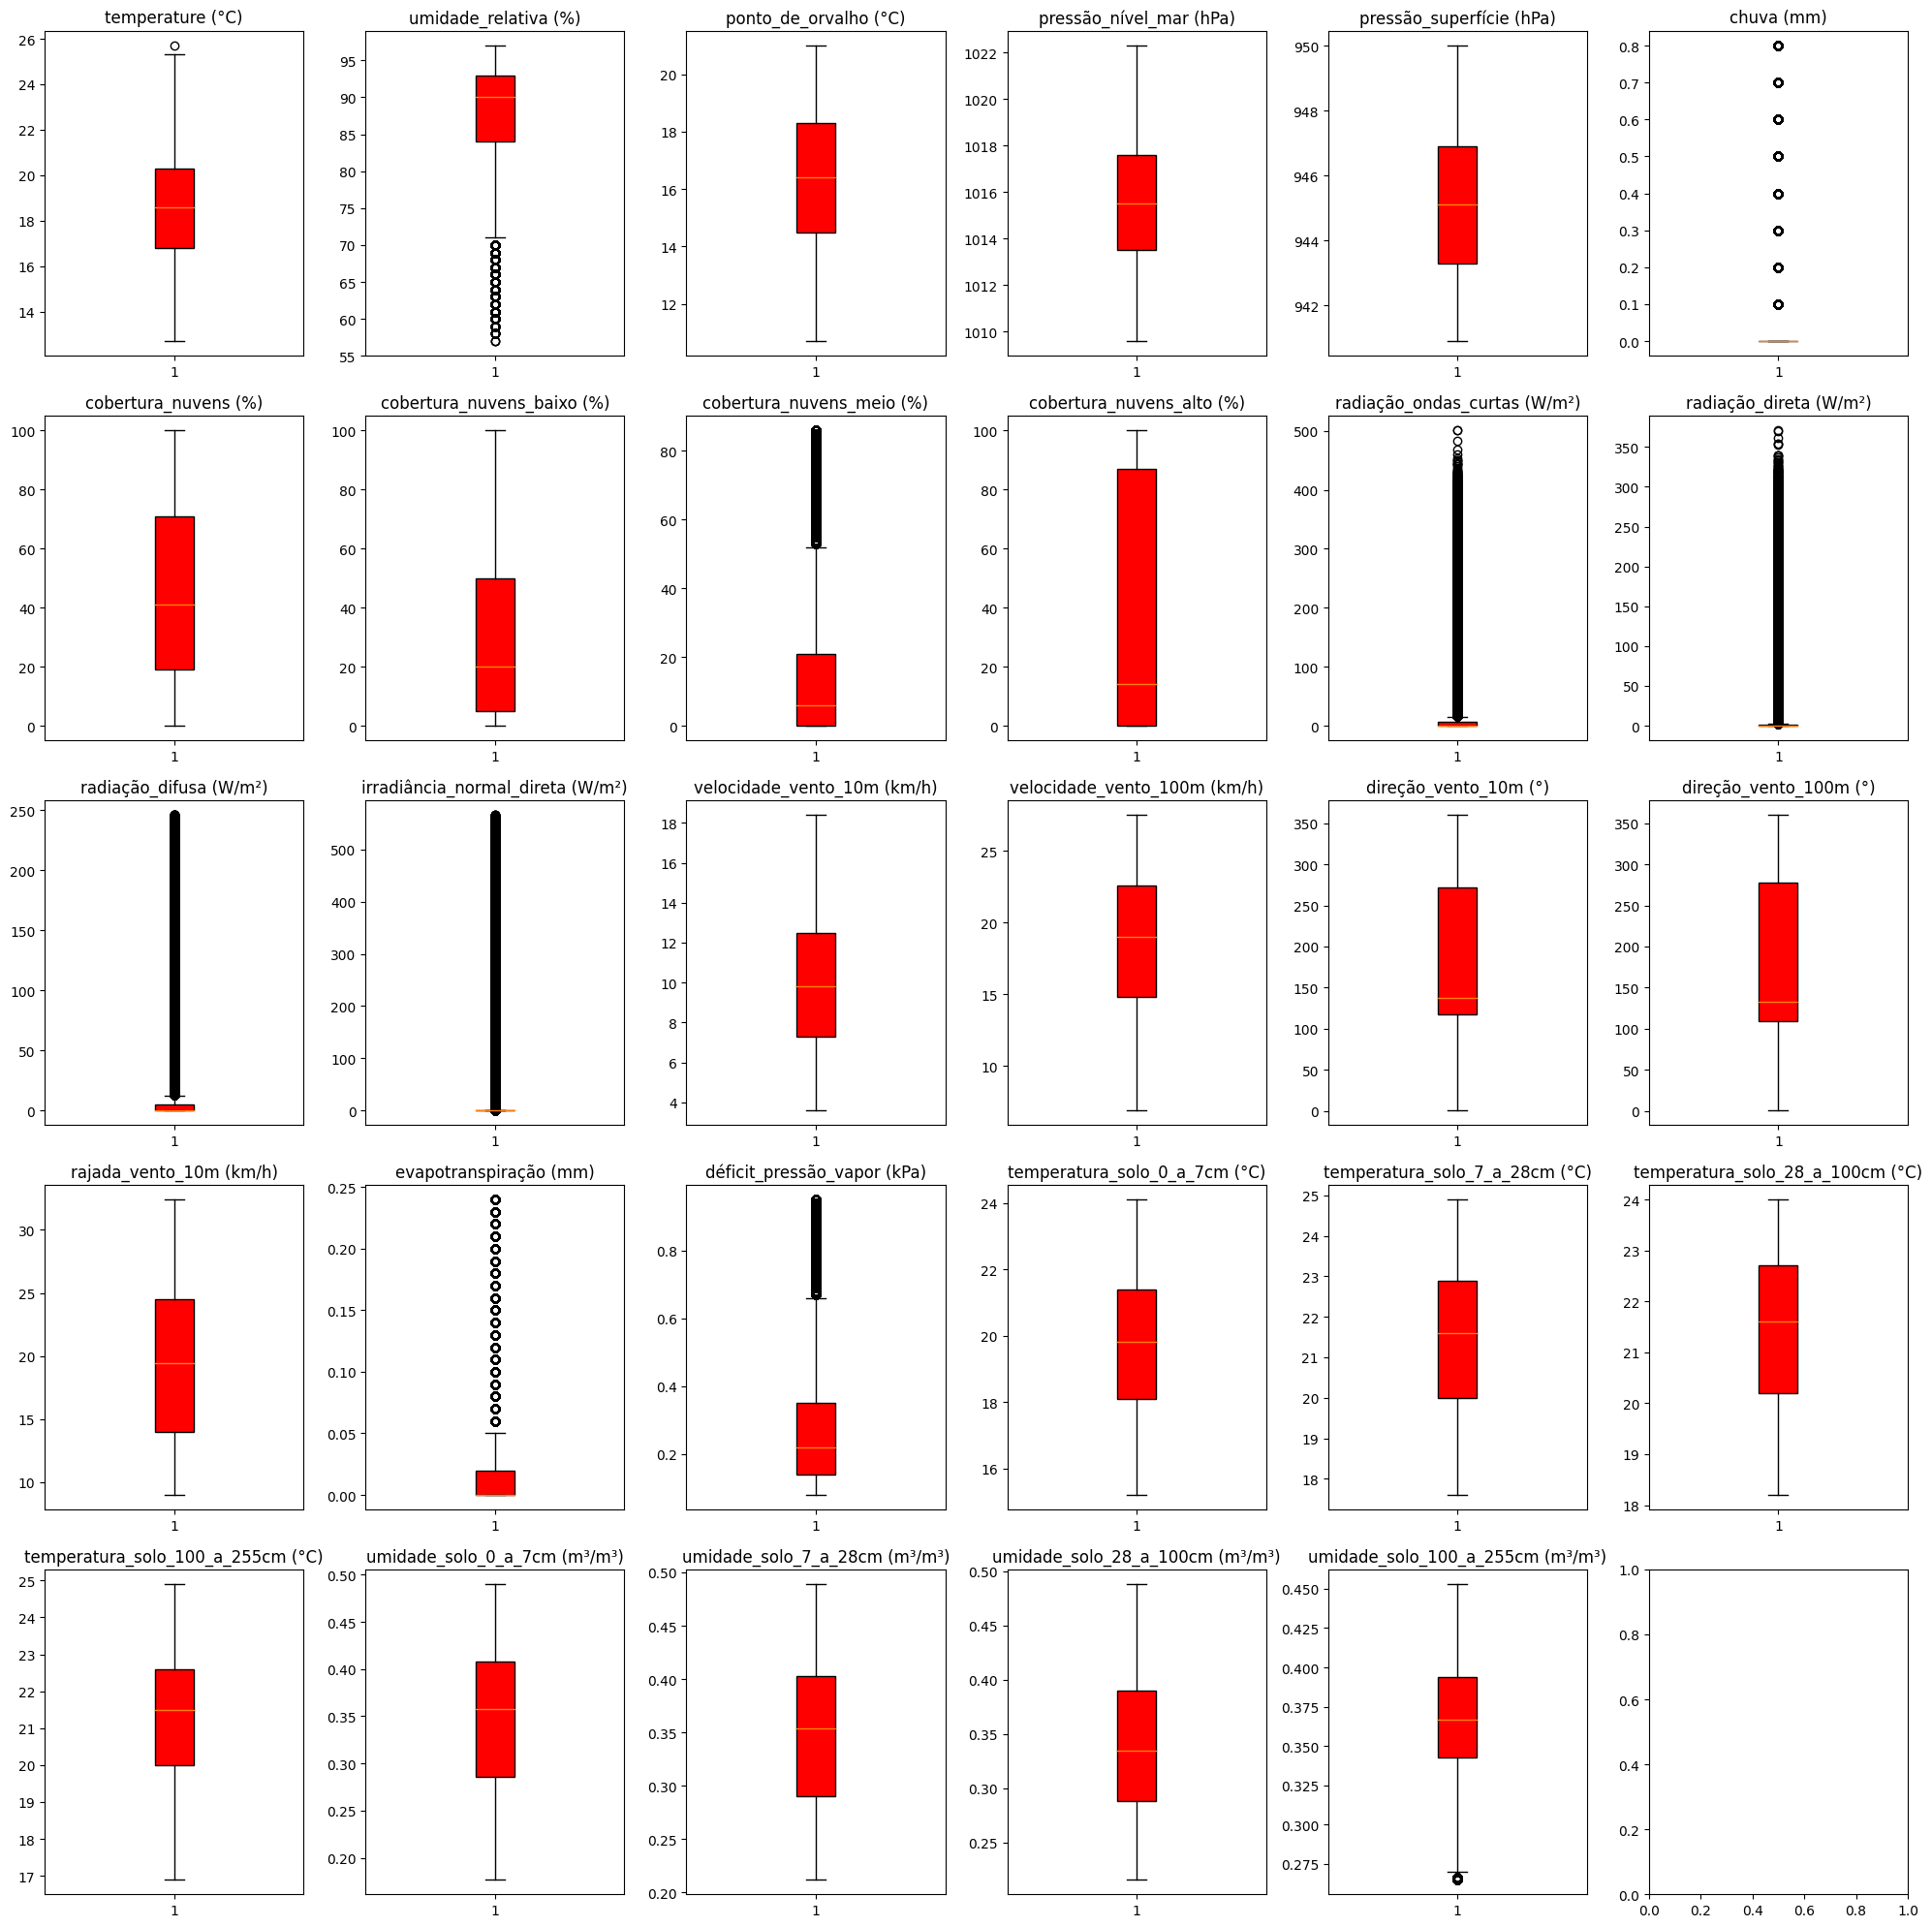

In [34]:
# Criando figura com 29 subplots
fig, axs = plt.subplots(5, 6, figsize=(20, 20))

# Plotando box plot de cada coluna em seu respectivo subplot
for i, col in enumerate(dataframe_no_outliers.columns):
    box = axs[i // 6, i % 6].boxplot(dataframe_no_outliers[col], patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor('red')
    axs[i // 6, i % 6].set_title(col)

# Ajustando espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

## **Dividindo os dados em conjunto de treinamento e conjunto teste**

Separando as variáveis independentes (features) da variável target (temperatura):

In [35]:
x=dataframe_no_outliers.iloc[:,1:]
y=dataframe_no_outliers.iloc[:,0]

Vendo a estrutura dos novos conjuntos, começando pelo de features:

In [36]:
x.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
Data/Hora,,,,,,,,,,,,,,,,,,,,,
1940-04-22T00:00,96.0,17.1,1016.1,945.4,0.0,15.0,3.0,21.0,0.0,0.0,...,0.00,0.09,20.4,21.6,21.2,21.4,0.342,0.338,0.363,0.453
1940-04-23T-13:00,91.0,18.5,1015.8,945.7,0.0,6.0,7.0,0.0,0.0,151.0,...,0.08,0.21,19.4,20.0,21.1,21.4,0.343,0.338,0.362,0.453
1940-04-23T-12:00,83.0,17.1,1016.0,945.9,0.0,1.0,1.0,0.0,0.0,368.0,...,0.21,0.41,19.0,20.0,21.1,21.4,0.342,0.338,0.362,0.453
1940-04-23T-1:00,94.0,17.5,1017.1,946.5,0.3,25.0,2.0,35.0,6.0,0.0,...,0.00,0.14,21.1,21.8,21.1,21.4,0.408,0.336,0.361,0.453
1940-04-23T00:00,94.0,17.7,1016.6,946.1,0.1,26.0,6.0,34.0,0.0,0.0,...,0.00,0.14,21.0,21.7,21.1,21.4,0.408,0.337,0.361,0.453


Conjunto correspondente à variável target:

In [37]:
y.head()

Data/Hora
1940-04-22T00:00     17.8
1940-04-23T-13:00    20.0
1940-04-23T-12:00    20.2
1940-04-23T-1:00     18.5
1940-04-23T00:00     18.8
Name: temperature (°C), dtype: float64

Dividindo cada conjunto (features e target) em subconjuntos de teste e treino do modelo:

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

Normalizando os dados de cada subconjunto:



In [41]:
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)
y_train_normalized = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_normalized = scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

Visualizando os subconjuntos com os dados normalizados, iniciando pelo subconjunto de features para treino:

In [42]:
x_train_normalized=pd.DataFrame(x_train_normalized,columns=x_train.columns)
x_test_normalized=pd.DataFrame(x_test_normalized,columns=x_test.columns)

y_train_normalized=pd.DataFrame(y_train_normalized,columns=['temperatura_media'])
y_test_normalized=pd.DataFrame(y_test_normalized,columns=['temperatura_media'])

x_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
0,0.800,0.834951,0.141732,0.109890,0.0,0.10,0.04,0.127907,0.00,0.0,...,0.000000,0.241379,0.808989,0.849315,0.810345,0.7500,0.591054,0.588448,0.698529,0.728723
1,0.975,0.825243,0.291339,0.263736,0.0,1.00,1.00,0.104651,0.93,0.0,...,0.000000,0.011494,0.730337,0.780822,0.741379,0.6000,0.827476,0.895307,0.764706,0.500000
2,0.950,0.708738,0.133858,0.032967,0.0,0.94,0.64,0.116279,1.00,0.0,...,0.000000,0.045977,0.595506,0.726027,0.827586,0.4500,0.543131,0.115523,0.158088,0.473404
3,0.850,0.339806,0.637795,0.604396,0.0,0.03,0.03,0.000000,0.00,0.0,...,0.000000,0.080460,0.247191,0.369863,0.637931,0.7375,0.322684,0.292419,0.511029,0.569149
4,0.700,0.582524,0.322835,0.285714,0.0,0.03,0.01,0.000000,0.07,0.0,...,0.041667,0.287356,0.696629,0.808219,0.706897,0.4750,0.680511,0.725632,0.830882,0.882979


Subconjunto de features para teste:

In [43]:
x_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),pressão_superfície (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_baixo (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),...,evapotranspiração (mm),déficit_pressão_vapor (kPa),temperatura_solo_0_a_7cm (°C),temperatura_solo_7_a_28cm (°C),temperatura_solo_28_a_100cm (°C),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_7_a_28cm (m³/m³),umidade_solo_28_a_100cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
0,0.794872,0.854369,0.203252,0.208791,0.0,0.71,0.34,0.197674,1.00,0.142857,...,0.166667,0.229885,0.730337,0.780822,0.948276,0.7125,0.853035,0.848375,0.764706,0.664894
1,0.948718,0.776699,0.552846,0.604396,0.0,0.65,0.70,0.034884,0.00,0.000000,...,0.000000,0.045977,0.617978,0.630137,0.551724,0.6875,0.840256,0.801444,0.761029,0.654255
2,0.948718,0.679612,0.512195,0.527473,0.0,0.88,0.12,0.953488,0.93,0.000000,...,0.000000,0.022989,0.494382,0.534247,0.603448,0.3875,0.667732,0.169675,0.132353,0.446809
3,0.897436,0.543689,0.146341,0.043956,0.0,0.64,0.48,0.348837,0.08,0.000000,...,0.000000,0.080460,0.460674,0.534247,0.724138,0.5125,0.849840,0.823105,0.411765,0.414894
4,0.820513,0.495146,0.569106,0.571429,0.0,0.69,0.55,0.023256,0.60,0.006397,...,0.125000,0.137931,0.483146,0.616438,0.827586,0.7625,0.763578,0.765343,0.654412,0.372340


Subconjunto da variável target para treino:

In [44]:
y_train_normalized.head()

,temperatura_media
0,0.653846
1,0.553846
2,0.476923
3,0.223077
4,0.500000


Subconjunto da variável target para teste:

In [45]:
y_test_normalized.head()

,temperatura_media
0,0.690476
1,0.547619
2,0.452381
3,0.380952
4,0.380952


Verificando se as variáveis preditoras são independentes, removendo dos subconjuntos de teste e treino aquelas com correlação maior do que 0,7 em relação a outra variável:

In [46]:
# Obtendo a matriz de correlação
corr_matrix = x.corr().abs()

# Definindo a matriz diagonal como zeros para evitar a remoção da mesma variável
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Encontrando pares de variáveis com alta correlação (maior que 0.7)
high_corr = corr_matrix.mask(mask).stack().reset_index()
high_corr.columns = ['var1', 'var2', 'corr']
high_corr = high_corr[high_corr['corr'] > 0.7]

# Criando uma lista com as variáveis a serem removidas
to_drop = []
for index, row in high_corr.iterrows():
    if row['var1'] not in to_drop:
        to_drop.append(row['var1'])

# Removendo as variáveis dos dataframes
x_train_normalized = x_train_normalized.drop(to_drop, axis=1)
x_test_normalized = x_test_normalized.drop(to_drop, axis=1)



Visualizando o subconjunto de treino de features com as variáveis restantes:

In [47]:
x_train_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
0,0.800,0.834951,0.141732,0.0,0.10,0.127907,0.00,0.0,0.486486,0.395543,0.7500,0.591054,0.728723
1,0.975,0.825243,0.291339,0.0,1.00,0.104651,0.93,0.0,0.216216,0.178273,0.6000,0.827476,0.500000
2,0.950,0.708738,0.133858,0.0,0.94,0.116279,1.00,0.0,0.479730,0.373259,0.4500,0.543131,0.473404
3,0.850,0.339806,0.637795,0.0,0.03,0.000000,0.00,0.0,0.695946,0.913649,0.7375,0.322684,0.569149
4,0.700,0.582524,0.322835,0.0,0.03,0.000000,0.07,0.0,0.547297,0.373259,0.4750,0.680511,0.882979


Visualizando o subconjunto de teste de features com as variáveis restantes:

In [48]:
x_test_normalized.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens (%),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),direção_vento_10m (°),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³),umidade_solo_100_a_255cm (m³/m³)
0,0.794872,0.854369,0.203252,0.0,0.71,0.197674,1.00,0.142857,0.418919,0.225627,0.7125,0.853035,0.664894
1,0.948718,0.776699,0.552846,0.0,0.65,0.034884,0.00,0.000000,0.648649,0.846797,0.6875,0.840256,0.654255
2,0.948718,0.679612,0.512195,0.0,0.88,0.953488,0.93,0.000000,0.229730,0.345404,0.3875,0.667732,0.446809
3,0.897436,0.543689,0.146341,0.0,0.64,0.348837,0.08,0.000000,0.412162,0.412256,0.5125,0.849840,0.414894
4,0.820513,0.495146,0.569106,0.0,0.69,0.023256,0.60,0.006397,0.729730,0.395543,0.7625,0.763578,0.372340


Identificando 10 variáveis mais significativas para a variável target (temperatura), utilizando o teste F de Fisher:

In [51]:
# definindo o número de features a serem selecionadas
k = 10

# criando o seletor de features
selector = SelectKBest(f_regression, k=k)

# aplicando o seletor aos dados de treino
x_train_selected = selector.fit_transform(x_train_normalized, y_train_normalized)

# aplicando o seletor aos dados de teste
x_test_selected = selector.transform(x_test_normalized)

# obtendo as features selecionadas
selected_features = x_test_normalized.columns[selector.get_support()]

print("Features selecionadas:", selected_features)

Features selecionadas: Index(['umidade_relativa (%)', 'ponto_de_orvalho (°C)',
       'pressão_nível_mar (hPa)', 'chuva (mm)', 'cobertura_nuvens_meio (%)',
       'cobertura_nuvens_alto (%)', 'radiação_ondas_curtas (W/m²)',
       'velocidade_vento_10m (km/h)', 'temperatura_solo_100_a_255cm (°C)',
       'umidade_solo_0_a_7cm (m³/m³)'],
      dtype='object')


In [52]:
new_x_train = x_train_normalized[selected_features]
new_x_test = x_test_normalized[selected_features]

Visualizando o subconjunto de treino com as variáveis selecionadas:

In [53]:
new_x_train.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³)
0,0.800,0.834951,0.141732,0.0,0.127907,0.00,0.0,0.486486,0.7500,0.591054
1,0.975,0.825243,0.291339,0.0,0.104651,0.93,0.0,0.216216,0.6000,0.827476
2,0.950,0.708738,0.133858,0.0,0.116279,1.00,0.0,0.479730,0.4500,0.543131
3,0.850,0.339806,0.637795,0.0,0.000000,0.00,0.0,0.695946,0.7375,0.322684
4,0.700,0.582524,0.322835,0.0,0.000000,0.07,0.0,0.547297,0.4750,0.680511


Visualizando o subconjunto de teste com as variáveis selecionadas:

In [54]:
new_x_test.head()

,umidade_relativa (%),ponto_de_orvalho (°C),pressão_nível_mar (hPa),chuva (mm),cobertura_nuvens_meio (%),cobertura_nuvens_alto (%),radiação_ondas_curtas (W/m²),velocidade_vento_10m (km/h),temperatura_solo_100_a_255cm (°C),umidade_solo_0_a_7cm (m³/m³)
0,0.794872,0.854369,0.203252,0.0,0.197674,1.00,0.142857,0.418919,0.7125,0.853035
1,0.948718,0.776699,0.552846,0.0,0.034884,0.00,0.000000,0.648649,0.6875,0.840256
2,0.948718,0.679612,0.512195,0.0,0.953488,0.93,0.000000,0.229730,0.3875,0.667732
3,0.897436,0.543689,0.146341,0.0,0.348837,0.08,0.000000,0.412162,0.5125,0.849840
4,0.820513,0.495146,0.569106,0.0,0.023256,0.60,0.006397,0.729730,0.7625,0.763578


# **Ajustando e avaliando o modelo de regressão linear**

In [57]:
regressor = LinearRegression()
model= regressor.fit(new_x_train,y_train_normalized)

Fazendo as predições com o subconjunto de teste de features:

In [58]:
y_pred = regressor.predict(new_x_test)

Avaliação do modelo de regressão linear, calculando os valores para o Coeficiente de Determinação R², Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE) e Erro Absoluto Médio (MAE):

In [66]:
accuracy = metrics.r2_score(y_test_normalized, y_pred)
print("R-squared:", accuracy)

R-squared: 0.9937605725820091


In [61]:
rmse = sqrt(mean_squared_error(y_test_normalized, y_pred))
print("RMSE:", rmse)

RMSE: 0.014702527347415149


In [62]:
mse = mean_squared_error(y_test_normalized, y_pred)
print("MSE:", mse)

MSE: 0.00021616431040149034


In [63]:
mae = metrics.mean_absolute_error(y_test_normalized, y_pred)
print("MAE:", mae)

MAE: 0.012236000538116529


Comparando temperaturas reais com as temperaturas previstas pelo modelo em uma semana (168 horas):

In [67]:
# aplicando fórmula para converter os valores previstos de temperatura em °C
y_pred_original = y_pred * (scaler.data_max_ - scaler.data_min_) + scaler.data_min_

# criando dataframe com os valores reais e previstos
dataframe_predict_actual = pd.DataFrame({'Reais': y_test.to_numpy().flatten(), 'Previstos': y_pred_original.flatten()})


# calculando a diferença entre os valores previstos e reais
dataframe_predict_actual['Diferença'] = dataframe_predict_actual['Previstos'] - dataframe_predict_actual['Reais']

# exibindo as primeiras 168 linhas do dataframe
print(dataframe_predict_actual.head(168))

     Reais  Previstos  Diferença
0     21.4  21.202620  -0.197380
1     19.6  19.245037  -0.354963
2     18.4  18.282551  -0.117449
3     17.5  17.283524  -0.216476
4     17.5  17.349051  -0.150949
..     ...        ...        ...
163   20.7  20.446578  -0.253422
164   17.0  16.971830  -0.028170
165   18.3  18.270601  -0.029399
166   18.6  18.271717  -0.328283
167   21.3  21.007386  -0.292614

[168 rows x 3 columns]


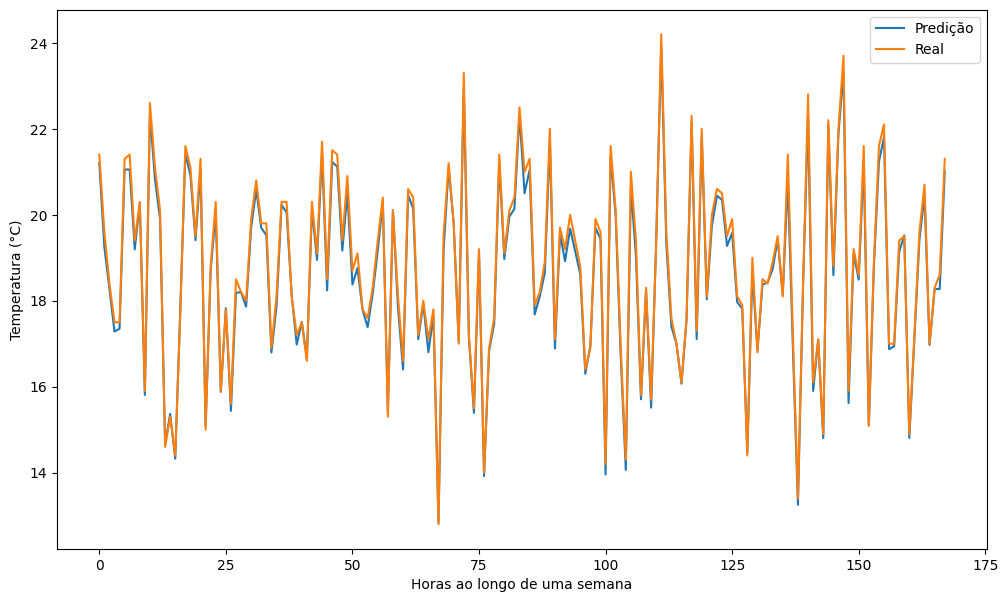

In [68]:
finaldataframe = dataframe_predict_actual.reset_index(drop=True)

plt.figure(figsize=(12, 7))
plt.plot(finaldataframe['Previstos'][:168], label="Predição")
plt.plot(finaldataframe['Reais'][:168], label="Real")
plt.xlabel('Horas ao longo de uma semana')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()